In [1]:
import sys; sys.path.append('..')
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
import os
import pickle
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
def save_obj(obj, name):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def c_f(tup):
    return (tup[0]-tup[1]) + 10*tup[1]

def merge_bg(depth, qubits, tprob):
    highbound = load_obj('random/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    lowbound = load_obj('random_lowbound/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    res = []
    for name in ['greedy_simp','random_simp']:
        avg_true = (c_f(highbound[name+'_c1_b_True']) + c_f(highbound[name+'_c-10_b_True']) + c_f(lowbound[name+'_c-20_b_True']) + c_f(lowbound[name+'_c-30_b_True']))/4
        avg_false = (c_f(highbound[name+'_c1_b_False']) + c_f(highbound[name+'_c-10_b_False']) + c_f(lowbound[name+'_c-20_b_False']) + c_f(lowbound[name+'_c-30_b_False']))/4
        res.append([avg_false,avg_true])
    return res

<ipython-input-4-4f9165f17049>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i,j].set_xticklabels(xs)


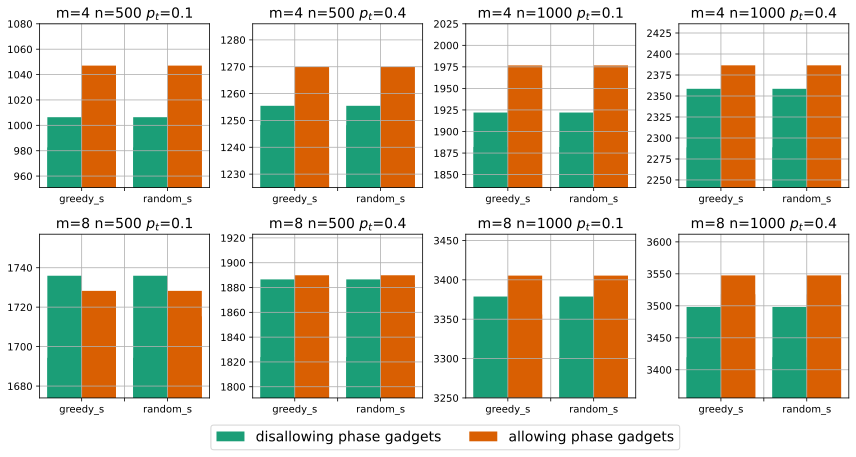

In [4]:
params = [[[500,4,1],[500,4,4],[1000,4,1],[1000,4,4]],[[500,8,1],[500,8,4],[1000,8,1],[1000,8,4]]]
names = ['disallowing phase gadgets','allowing phase gadgets']
xs = ['','greedy_s','','random_s']
colors = ['#1b9e77', '#d95f02', '#7570b3']
styles = ['-','--','-.']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,6))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[i,j].set_title('m='+str(params[i][j][1])+' n='+str(params[i][j][0])+' $p_t$=0.'+str(params[i][j][2]),fontsize=14)
        yys = merge_bg(params[i][j][0],params[i][j][1],params[i][j][2])
        y = np.arange(2)  # Label locations  
        width = 0.4
        low = 10000
        high = 0 
        for k, ys in enumerate(yys):
            for l in [0,1]:
                if ys[l] < low:
                    low = ys[l]
                if ys[l] > high:
                    high = ys[l]
            axs[i,j].bar(y - width/2, ys[0], width, label=names[k] if k == 0 and i==0 and j == 0 else '', color=colors[0])
            axs[i,j].bar(y + width/2, ys[1], width, label=names[k+1] if k == 0 and i==0 and j == 0 else '', color=colors[1])
#             axs[i,j].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[i,j].set_ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        axs[i,j].set_xticklabels(xs)
        axs[i,j].grid()
plt.figlegend(loc='lower center', bbox_to_anchor=(0.52,-0.07),fontsize=14,ncol=2)
# plt.figlegend(bbox_to_anchor=(.18, 0), loc='upper left',
#           ncol=3, borderaxespad=0)
# plt.suptitle('Post-Optimization results restricting phase gadget rule applications',fontsize=12)
plt.tight_layout()

plt.show()

In [8]:
fig.savefig(r'/home/korbinian/Documents/master/stau21/Dokumentation/Latex/Bilder/evaluation/gadget_compare.pdf',bbox_inches='tight')